In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [107]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 
classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
#classifier.add(GlobalAveragePooling2D())
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=2,activation='softmax'))
adam = Adam(lr=0.001)
classifier.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(r'D:\RAJ\AI\dataset\training_set',
                                             target_size=(64,64),
                                             class_mode='sparse')

test_set1 = test_datagen.flow_from_directory(r'D:\RAJ\AI\dataset\test_set',
                                            target_size=(64,64),
                                            class_mode='sparse')
print(train_set.class_indices)
print(test_set1.class_indices)


In [127]:
classifier.fit_generator(train_set, 
                        epochs = 5,validation_data=test_set1
                        )


Epoch 1/5
250/250 [==============================] - 153s 610ms/step - loss: 0.6933 - accuracy: 0.4832 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
250/250 [==============================] - 158s 634ms/step - loss: 0.6933 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
250/250 [==============================] - 162s 649ms/step - loss: 0.6933 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
250/250 [==============================] - 168s 672ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
250/250 [==============================] - 155s 621ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6931 - val_accuracy: 0.5000


In [74]:
classifier.save(r'D:\RAJ\AI\catdogmodel1.h5')


In [75]:
from tensorflow.keras.models import load_model
model = load_model(r'D:\RAJ\AI\catdogmodel1.h5')


In [76]:
from tensorflow.keras.preprocessing import image
import cv2

In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [78]:
img1 = image.load_img(r"D:\RAJ\AI\dataset\test_set\dogs\dog.4002.jpg", target_size=(64, 64))
#img2=cv2.resize(img1, (64,64)
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction=classifier.predict_classes(img)

(1, 64, 64, 3)


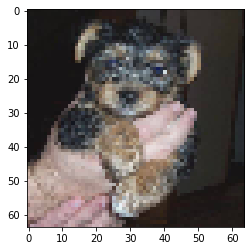

array([1], dtype=int64)

In [79]:
plt.imshow(img1)
plt.show()
prediction

In [80]:
img2 = image.load_img(r"D:\RAJ\AI\dataset\test_set\cats\cat.4014.jpg", target_size=(64, 64))
img3 = image.img_to_array(img2)
img3 = img3/255
# create a batch of size 1 [N,H,W,C]
img3 = np.expand_dims(img3, axis=0)
prediction1 = classifier.predict_classes(img3)

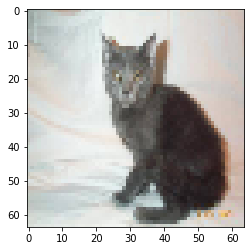

In [81]:
prediction1
plt.imshow(img2)
plt.show()

In [82]:

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

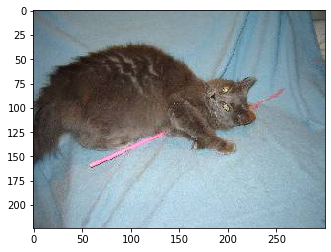

In [83]:
img7 = image.load_img(r"D:\RAJ\AI\dataset\test_set\cats\cat.4016.jpg")
plt.imshow(img7)
#preprocess image
img8 = image.load_img(r"D:\RAJ\AI\dataset\test_set\cats\cat.4016.jpg", 
                      target_size=(64, 64))
img8 = image.img_to_array(img8)
img8 = img8/255
img8 = np.expand_dims(img8, axis=0)


In [84]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)


layer name :  ['conv2d_2', 'max_pooling2d_1', 'conv2d_3', 'max_pooling2d_2', 'flatten_1', 'dense_2', 'dense_3']


In [85]:
from tensorflow.keras.models import Model
conv2d_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_2').output)
conv2d_1_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_3').output)

In [86]:
conv2d_2_features = conv2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
print('First conv layer feature output shape : ',conv2d_2_features.shape)
print('second conv layer feature output shape : ',conv2d_3_features.shape)

First conv layer feature output shape :  (1, 62, 62, 64)
second conv layer feature output shape :  (1, 29, 29, 64)


In [89]:
conv2d_features=conv2d_2_features.reshape(62,62,64)
conv2d_1_features=conv2d_3_features.reshape(29, 29, 64)

In [93]:
print('First conv layer feature output shape : ',conv2d_features.shape)
print('second conv layer feature output shape : ',conv2d_1_features.shape)

First conv layer feature output shape :  (62, 62, 64)
second conv layer feature output shape :  (29, 29, 64)


In [94]:
import matplotlib.image as mpimg

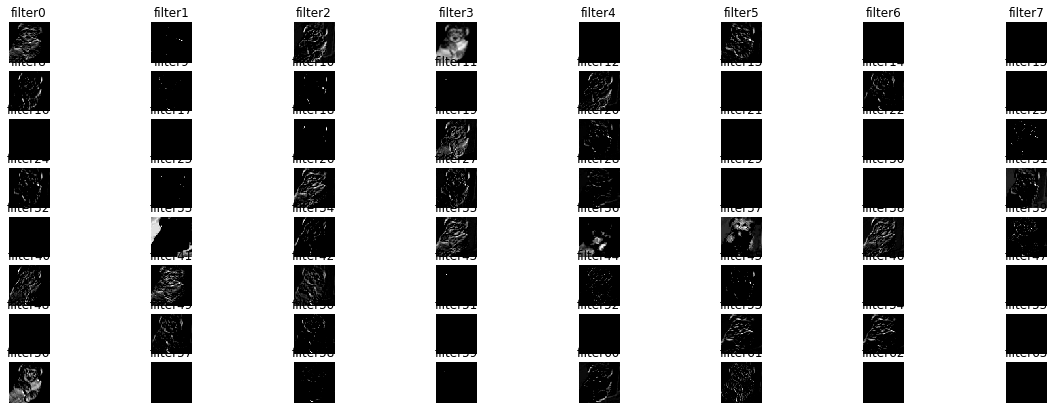

In [95]:
fig=plt.figure(figsize=(20,7))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[:, :, i], cmap='gray')
plt.show()

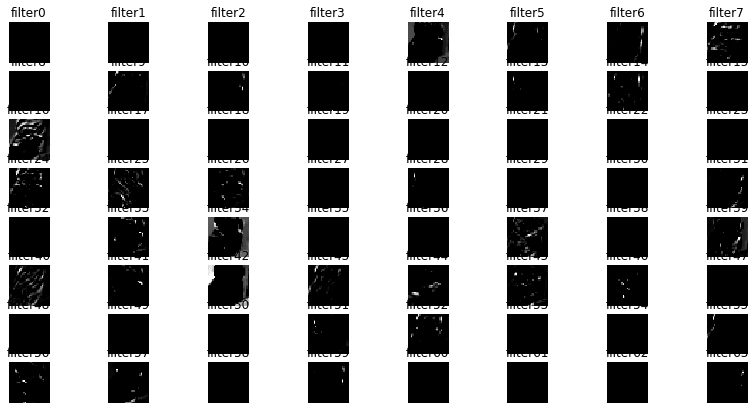

In [96]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[ :, :, i], cmap='gray')
plt.show()

In [97]:
testpred=classifier.predict_classes(test_set1)
testpred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [98]:

testorg=test_set1.classes

In [99]:
testorg

array([0, 0, 0, ..., 1, 1, 1])

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(testorg,testpred)


0.495

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testorg,testpred)


array([[471, 529],
       [481, 519]], dtype=int64)